In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

Text(0.5, 1.0, 'Dataset Visualisation')

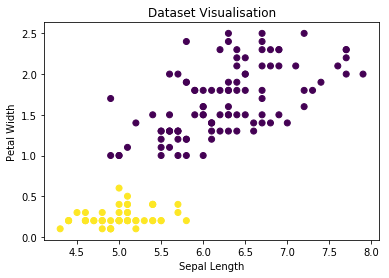

In [177]:
dataset = load_iris()
df = pd.DataFrame()
df['SL'] = dataset['data'][:,0]
df['PW'] = dataset['data'][:,3]
new = [1]*150
new[50:] = [-1]*100
df['Class']=new
X = np.array(df[['SL','PW']])
y = np.array(df['Class'])
plt.scatter(df['SL'],df['PW'],c=df['Class'])
plt.ylabel('Petal Width')
plt.xlabel('Sepal Length')
plt.title('Dataset Visualisation')

### 1(a)(i)

In [178]:
w = cp.Variable(2)
bias = cp.Variable()
objective = cp.Minimize(0.5*cp.norm(w,p=2)**2)
const = [y[i]*(X[i]*w+bias)>=1 for i in range(150)]
prob = cp.Problem(objective,constraints=const)
prob.solve()

12.499999992199678

In [179]:
w.value,bias.value

(matrix([[-2.46457378e-10],
         [-5.00000000e+00]]), 4.000000000523911)

### 1(a)(ii) - Dual Value

In [180]:
for i in range(len(const)):
    print(const[i].dual_value)

7.968253148302717e-11
7.764043995475238e-11
7.594477977159716e-11
7.519665462479198e-11
7.861145782321057e-11
1.792224198721604e-10
9.89898133730647e-11
7.861145782321057e-11
7.384700921069984e-11
6.242799252666243e-11
8.367075839577534e-11
7.675564295541787e-11
6.182714157113402e-11
5.926176793095621e-11
9.183743077531664e-11
2.288136501934967e-10
1.792224198721604e-10
1.0628318564010825e-10
1.2701162225927416e-10
1.0628318564010825e-10
8.367075839577534e-11
1.5950365985276514e-10
7.519665462479198e-11
3.1403801225380083e-10
7.675564295541787e-11
7.861145782321057e-11
1.5549200418053286e-10
8.086960973992243e-11
8.086960973992243e-11
7.594477977159716e-11
7.675564295541787e-11
1.792224198721604e-10
6.450885177873615e-11
8.533516181229819e-11
6.242799252666243e-11
7.861145782321057e-11
8.533516181229819e-11
6.242799252666243e-11
7.384700921069984e-11
7.968253148302717e-11
1.0440516346504975e-10
9.800158122890561e-11
7.384700921069984e-11
12.499998706781536
1.5950365985276514e-10
1.0134

### 1(a)(iii)  Plot learnt SVM with Margin and Classification Plane

In [181]:
def line(w,x,b):
    return -(float(w[0])*x+b)/(float(w[1]))
def _class_(w,x,cls,b):
    return (cls-(b+float(w[0])*x))/float(w[1])
positive_class = []
negative_class = []
for i in range(len(X)):
    if (X[i]*w.value+bias.value)[0]<=1.00005 and (X[i]*w.value+bias.value)[0]>=0.99995:
        positive_class.append(X[i])
    if (X[i]*w.value+bias.value)[0]<=-0.00005 and (X[i]*w.value+bias.value)[0]>=-1.00005:
        negative_class.append(X[i])

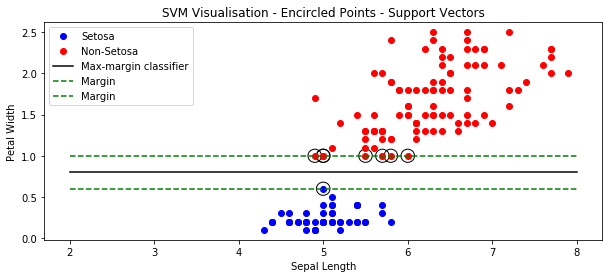

In [182]:
# circlesp = []
# circlesn = []
plt.figure(figsize=(10,4))

ax=plt.gca()
for i in range(len(positive_class)):
    ax.add_artist(plt.Circle((positive_class[i][0],positive_class[i][1]),0.08,fill=False))
for i in range(len(negative_class)):
    ax.add_artist(plt.Circle((negative_class[i][0],negative_class[i][1]),0.08,fill=False))

plt.plot(X[:,0][:50],X[:,1][:50],"bo",label='Setosa')
plt.plot(X[:,0][50:],X[:,1][50:],"ro",label='Non-Setosa')
plt.plot([i for i in range(2,9)],[line(w.value,i,bias.value) for i in range(2,9)],c='black',label='Max-margin classifier')
plt.plot([i for i in range(2,9)],[_class_(w.value,i,1,bias.value) for i in range(2,9)],c='green',label='Margin',ls='--')
plt.plot([i for i in range(2,9)],[_class_(w.value,i,-1,bias.value) for i in range(2,9)],c='green',label='Margin',ls='--')

plt.xlabel('Sepal Length',fontsize=10)
plt.ylabel('Petal Width')
plt.title('SVM Visualisation - Encircled Points - Support Vectors')
# ax.set_xlim((0,10))
# ax.set_ylim((0,10))
plt.legend()

### 1(a)(iv) Sklearn's SVM - Todo

In [200]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(X,y)
svc.coef0,svc.coef_

(0.0, array([[-0.00382218, -3.32886198]]))

### 1(a)(v)

In [224]:
df = pd.DataFrame()
pc = np.array(positive_class)
nc = np.array(negative_class)
new = []
for i in range(len(pc)):
    new.append(np.array([pc[i][0],pc[i][1],1]))
for i in range(len(nc)):
    new.append(np.array([nc[i][0],nc[i][1],-1]))
new = np.array(new)
df['SL']=new[:,0]
df['PW']=new[:,1]
df['y']=new[:,2]

In [226]:
new_X = np.array(df[['SL','PW']])
new_y = np.array(df['y'])
w = cp.Variable(2)
bias = cp.Variable()
objective = cp.Minimize(0.5*cp.norm(w,p=2)**2)
const = [new_y[i]*(new_X[i]*w+bias)>=1 for i in range(8)]
prob = cp.Problem(objective,constraints=const)
prob.solve()

12.499999924953572

In [227]:
w.value,bias.value

(matrix([[-1.66837660e-07],
         [-5.00000001e+00]]), 4.00000083555445)

As can be seen from above, yes, indeed we get the same value for the coefficients even after solving only with the support vectors. This is because the maximum-margin is really determined only by the support vectors and only they contribute in the Lagrange Multiplier coefficients. The coefficients are non-zero only for the support vectors and are zero otherwise.